In [4]:
from ecell4 import *
import math
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = GSLRandomNumberGenerator()
import scipy.special

In [5]:
voxelr = 0.005
L = 1.
V=L**3
Da = 10.
Db = 0.
kD = 4*3.14*2*voxelr*Da
print kD

ka = 1*kD

tmol = 2*voxelr*voxelr/3./Da
tb = (0.5*0.5*L*L)/6./Da #time to boundary
print 'tmol',tmol,tb,tb/tmol
pacc = ka/6./(2**0.5)/Da/voxelr
P = 1. #must be less then one
print 'pacc',pacc,'pacc/tmol',pacc/tmol
totalpreb = 1./(1+kD/ka)
print 'totalpreb',totalpreb
alpha = 1./pacc
print 'alpha',alpha
#prebt = (1+math.exp(tmol)*(scipy.special.erf(math.sqrt(tmol))-1))/(1+kD/ka)
#print prebt


1.256
tmol 1.66666666667e-06 0.00416666666667 2500.0
pacc 2.96042039057 pacc/tmol 1776252.23434
totalpreb 0.5
alpha 0.337789863624


In [6]:
lamdar = pacc/tmol/12
lamdas = 1./tmol
print lamdar,lamdas

def rant(lamda):
    return np.random.exponential(1/lamda)  

148021.019528 600000.0


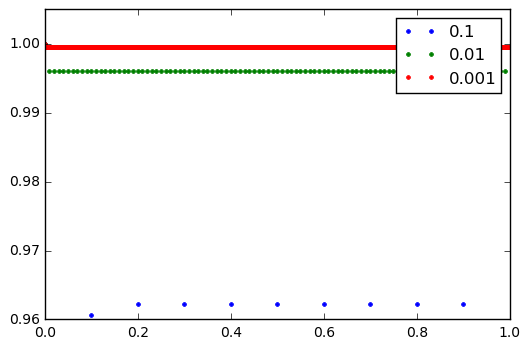

In [17]:
for a in [0.1,0.01,0.001]:
    C=a*alpha*(pacc+11)/12
    ms = np.arange(0,1,a)   
    s= [(C*(-C)**i+1)/(C+1) for i in range(len(ms))]
    plt.plot(ms,s,'.',label=str(a))
plt.legend()

In [213]:
def create_model_spa(Da,Db,voxelr,k): 
    with species_attributes():
        A | {'D': str(Da), 'radius':str(voxelr)}        
    return get_model()

In [214]:
#spatio
def spa_singlerun():
    model = create_model_spa(Da,Db,voxelr,ka)
    w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),voxelr,rng)    
    w.bind_to(model)
    oricord = 727208
    oripos = w.coordinate2position(oricord)
    FN = w.get_neighbor(oricord,2)   
    Apos = w.coordinate2position(FN)
    #(pid,p),suc = w.new_particle(Species("A"),FNpos)
    #print np.linalg.norm(np.array(Apos)-np.array(tuple(ori)))    
    #print np.linalg.norm(np.array(tuple(FNpos))-np.array(tuple(ori)))
    #dt = rant(lamda)
    #w.remove_particle(pid)
    (pid,p),suc = w.new_particle(Species("A"),Apos)     
    sim = spatiocyte.SpatiocyteSimulator(w)
    sim.initialize()    
    duration = tb    
    while sim.t() <= duration:
        #print 't',sim.t()
        #dt = rant()
        pid,Apos = w.get_particle(pid)
        dist = np.array(tuple(Apos.position()))-np.array(tuple(oripos))
        length = np.linalg.norm(dist)      
        if (length<=0.011):# and (dt<tmol):        
            dtr = rant(lamdar)
            dts = rant(lamdas)
        else:
            dtr = np.inf#10*tmol
            dts = rant(lamdas)
        if (dtr<tmol and dtr<dts):
            
            return sim.t()+dtr                     
        else:
            ct = sim.t()
            sim.step()
            sim.set_t(ct+dts)           
        pid,Apos1 = w.get_particle(pid)
        dist = np.array(tuple(Apos1.position()))-np.array(tuple(oripos))
        length = np.linalg.norm(dist) 
        #print 'length',length
        if (length<=0.005):
            #print 'pos correct'
            w.remove_particle(pid)
            (pid,p),suc = w.new_particle(Species("A"),Apos.position())    
        elif (length>0.5*L):
            break            
    return 0

In [215]:
#normal
rebtime =[]
#rng.seed(0)
trial = 500
for i in range(trial):
    suc = spa_singlerun()
    if (suc!=0):
        rebtime.append(suc)
        #print i,suc

In [216]:
rebtime = np.array(rebtime)
print min(rebtime),max(rebtime)
print float(len(rebtime))/trial
print float(len(rebtime[rebtime<tmol]))/trial
#print float(len(rebtime[rebtime>=tmol]))/trial

5.15535516352e-08 0.0015909775658
0.396
0.174


0.392


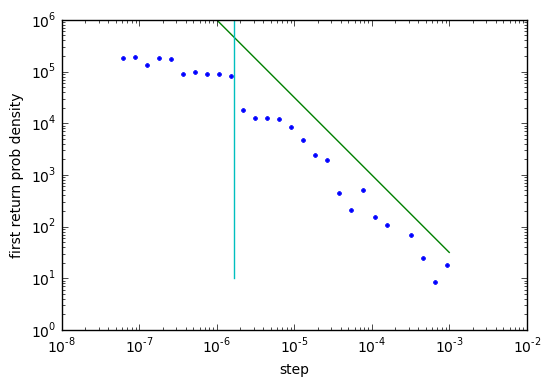

In [221]:
hist, bin_edges = np.histogram(rebtime,bins=np.logspace(np.log10(min(rebtime)),np.log10(max(rebtime)),30))
tt = 0.5*(bin_edges[:-1]+bin_edges[1:])
binwid = -(bin_edges[:-1]-bin_edges[1:])
ft = np.array([float(h)/trial/b for h,b in zip(hist,binwid)])
plt.loglog(tt,ft,'.')
z = lambda x: 1e-3*(x**-1.5) #t^(-0.5)
#w = lambda x: 0.1*(x**-0.5) #t^(-0.5)
plt.plot(np.logspace(-6,-3,50),z(np.logspace(-6,-3,50)),label='p ~ t^-1.5')
#plt.plot(np.logspace(-6,1,50),w(np.logspace(-6,1,50)),'r',label='p ~ t^-0.5')
prange = np.logspace(1,6,10)
plt.plot([tmol]*len(prange),prange,'c')
plt.xlabel('step')
plt.ylabel('first return prob density')
totalsum = sum(ft*binwid)
print totalsum

In [44]:
a = 1.
R = 0.005
l = 2*R
ip1 = 1./1.393
B = (1-ip1)/(1-(1-a)*(1-ip1))
C = 2*a*l*(1-a*B)/math.pi
factor = (1./(1-C/R) -1)/4/math.pi/R/R
print factor

33841.2820553


In [40]:
1-1./1.393

0.2821249102656138

In [43]:
1./(1./2679 +1)

0.9996268656716417

In [22]:
suc=False
r=[False,False,True,False]
i=0
while (suc==False):
    print i
    suc=r[i]
    i+=1

0
1
2


In [57]:
0.5-(0.5724*0.5)

0.2138

In [66]:
r=1.
f = 1./r
0.4276/(1+f)

0.2138

In [68]:
0.5724*0.91

0.520884

In [50]:
0.4276/0.5424/2

0.3941740412979351

In [220]:
p = np.array([0.3994,0.8958,0.9918])
print 1./(1./p-1)

[   0.66500167    8.59692898  120.95121951]
